In [14]:
#YC95

# Chapter 8: The Naïve Bayes Classifier

## Instructions for Assignment 5

Run each of the code blocks below and before running the block put your initials followed by last two digits of your ID as a comment first.

Change all variables used with the extension of your initials and last two digits of your ID, i.e. delays_df will be named delays_dfJD48 if student's name is Jane Doe with last two digits of ID 48. All variables in all code blocks will be changed similarly.

And then write a comment to explain the code block shortly. You can make use of the comments from the textbook. Your comments can be very short for obvious and short blocks.

But be careful that no student's initials and ID digits should appear in another student's submission. Otherwise, I will file your case to the Academic Integrity Office and warn you while decreasing your letter grade below one level.

Save this file like "ADTA 5230.100 Module 5 Chapter 8 Hands On, LAST NAME First Name Last Two Digits of Your ID", like "ADTA 5230.100 Module 5 Chapter 8 Hands On DOE Jane 48".

You will submit the ipynb file with Python code blocks run, as well as a PDF file that you will save after putting all your comments and running code blocks.

Notes:
1. Code blocks below are originated from the textbook.

2. Refer to notes of the textbook for further explanations of these codes.

Make sure dmba package is installed

In [15]:
pip install dmba

In [16]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt

import dmba
from dmba import classificationSummary, gainsChart

%matplotlib inline

## Table 8.4

In [17]:
delays_df = dmba.load_data('FlightDelays.csv')
delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [18]:
delays_df = dmba.load_data('FlightDelays.csv')

# convert to categorical
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')
delays_df['Flight Status'] = delays_df['Flight Status'].astype('category')

# create hourly bins departure time
delays_df.CRS_DEP_TIME = [round(t / 100) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')

predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
outcome = 'Flight Status'

X = pd.get_dummies(delays_df[predictors])
y = delays_df['Flight Status']
classes = list(y.cat.categories)

# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)

## Table 8.5
First construct a frequency table and then convert it to the propability table

In [19]:
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(delays_df, test_size=0.4, random_state=1)

pd.set_option('display.precision', 4)
# probability of flight status
print(train_df['Flight Status'].value_counts() / len(train_df))
print()

for predictor in predictors:
    # construct the frequency table
    df = train_df[['Flight Status', predictor]]
    freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)

    # divide each row by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()
pd.reset_option('display.precision')

ontime     0.8023
delayed    0.1977
Name: Flight Status, dtype: float64

DAY_WEEK            1       2       3       4       5      6       7
Flight Status                                                       
delayed        0.1916  0.1494  0.1149  0.1264  0.1877  0.069  0.1609
ontime         0.1246  0.1416  0.1445  0.1794  0.1690  0.136  0.1048

CRS_DEP_TIME        6       7       8       9      10      11      12      13  \
Flight Status                                                                   
delayed        0.0345  0.0536  0.0651  0.0192  0.0307  0.0115  0.0498  0.0460   
ontime         0.0623  0.0633  0.0850  0.0567  0.0519  0.0340  0.0661  0.0746   

CRS_DEP_TIME       14      15      16      17      18      19      20      21  
Flight Status                                                                  
delayed        0.0383  0.2031  0.0728  0.1533  0.0192  0.0996  0.0153  0.0881  
ontime         0.0576  0.1171  0.0774  0.1001  0.0349  0.0397  0.0264  0.0529  

ORIG

In [21]:
# P(delayed | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_delayed = 0.0958 * 0.1609 * 0.0307 * 0.4215 * 0.5211 * 0.1977
# P(ontime | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_ontime = 0.2040 * 0.1048 * 0.0519 * 0.5779 * 0.6478 * 0.8023
print('P_hat_delayed ~ ', P_hat_delayed)
print('P_hat_ontime ~ ', P_hat_ontime)

print('P(delayed|...) = ', P_hat_delayed / (P_hat_delayed + P_hat_ontime))
print('P(ontime|...) = ', P_hat_ontime / (P_hat_delayed + P_hat_ontime))

P_hat_delayed ~  2.0548742506526157e-05
P_hat_ontime ~  0.00033326464123921066
P(delayed|...) =  0.05807791183301656
P(ontime|...) =  0.9419220881669834


## Table 8.6

In [22]:
# Subset a specific set
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred}),
                pd.DataFrame(predProb_valid, index=y_valid.index)], axis=1)
mask = ((X_valid.CARRIER_DL == 1) & (X_valid.DAY_WEEK_7 == 1) & (X_valid.CRS_DEP_TIME_10 == 1) &
        (X_valid.DEST_LGA == 1) & (X_valid.ORIGIN_DCA == 1))

print(df[mask])

      actual predicted         0         1
1225  ontime    ontime  0.057989  0.942011


## Table 8.7

In [23]:
classificationSummary(y_train, y_train_pred, class_names=classes)

print()

classificationSummary(y_valid, y_valid_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7955)

        Prediction
 Actual delayed  ontime
delayed      52     209
 ontime      61     998

Confusion Matrix (Accuracy 0.7821)

        Prediction
 Actual delayed  ontime
delayed      26     141
 ontime      51     663


## Figure 8.1

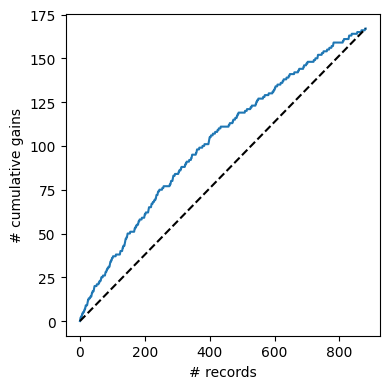

In [24]:
df = pd.DataFrame({'actual': 1 - y_valid.cat.codes, 'prob': predProb_valid[:, 0]})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
gainsChart(df.actual, ax=ax)

plt.tight_layout()
plt.show()

In [25]:
import numpy as np
np.exp(delays_nb.feature_log_prob_)

array([[0.03831098, 0.02988425, 0.02298965, 0.02528785, 0.03754491,
        0.01379685, 0.03218245, 0.00690226, 0.01073259, 0.01303079,
        0.00383799, 0.00613619, 0.00230586, 0.00996652, 0.00920046,
        0.00766832, 0.04060918, 0.01456292, 0.03065031, 0.00383799,
        0.01992539, 0.00307193, 0.01762719, 0.01609505, 0.10419268,
        0.07967856, 0.07584823, 0.03984311, 0.08427496, 0.01149866,
        0.0628251 , 0.01915932, 0.04443951, 0.00153979, 0.04367344,
        0.00307193, 0.01379685],
       [0.02492933, 0.02832852, 0.02889505, 0.03588229, 0.033805  ,
        0.02719546, 0.0209636 , 0.01246561, 0.01265445, 0.01699787,
        0.01133254, 0.01038832, 0.00680028, 0.01322098, 0.01492058,
        0.01152139, 0.02341857, 0.01548711, 0.02001938, 0.00698912,
        0.00793335, 0.00528953, 0.01057716, 0.01208792, 0.12954902,
        0.05835475, 0.05325596, 0.03116118, 0.11557455, 0.00698912,
        0.04589103, 0.04079224, 0.02341857, 0.00207917, 0.033805  ,
        0.00340

In [26]:
# ADTA 5230 Module 5, Chapter 8 Class Exercises